# Classification Models for Multiclass Classification

### Importing Libraries and Dataset

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


Here we have 1797 images of 8 * 8 giving us a total of 64 attributes/features having pixel value between 0-16

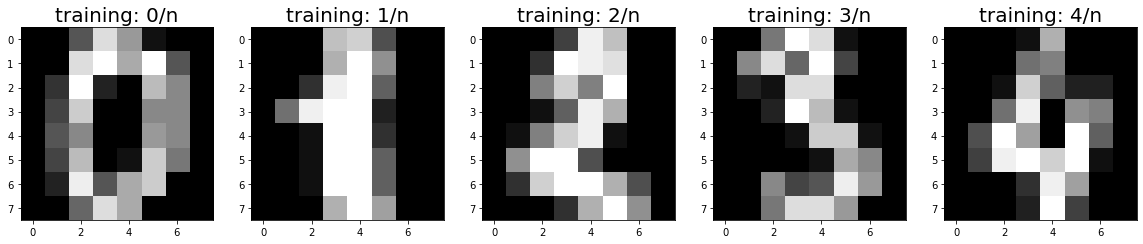

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
    plt.title('training:% i/n' % label,fontsize = 20)

In [10]:
#as the LR model is not converging we are using scale to scale our data, this practice benifits the model fitting
from sklearn.preprocessing import scale
data = scale(digits.data)

In [11]:
data[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size =0.2, random_state = 42)

## Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
logesticReg =  LogisticRegression(max_iter=100)
logesticReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(logesticReg.predict(x_test[0].reshape(1,-1)))

[6]


In [17]:
logesticReg.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [18]:
predictions = logesticReg.predict(x_test)

In [19]:
score = logesticReg.score(x_test,y_test)
print(score)

0.9722222222222222


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


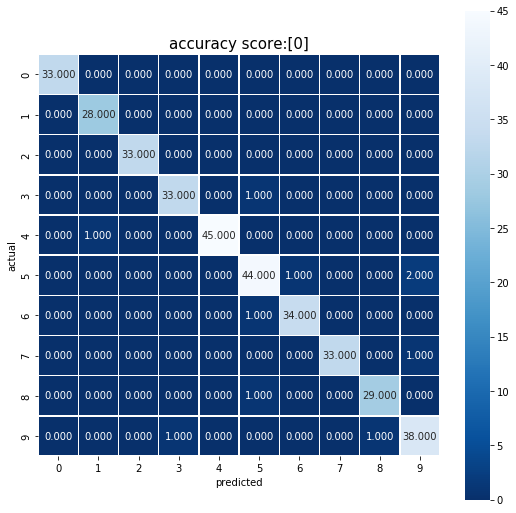

In [23]:
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize = (9,9))
sns.heatmap(cm,annot = True, fmt = ".3f",linewidths=.5, square = True,cmap='Blues_r');
plt.ylabel('actual');
plt.xlabel('predicted');
all_sample_title = 'accuracy score:[0]'.format(score)
plt.title(all_sample_title,size = 15);

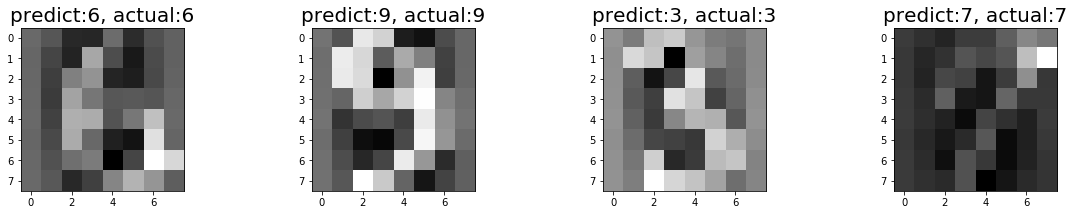

In [24]:
index = 0
classificationIndex = []
for predict, actual in zip(predictions, y_test):
    if(predict == actual):
        classificationIndex.append(index)
    index +=1
plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(classificationIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap = plt.cm.gray)
    plt.title("predict:{}, actual:{}" .format(predictions[wrong],y_test[wrong]),fontsize = 20)


## K-Means Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [42]:
score1 = knn.score(x_test,y_test)
print(score1)

0.9722222222222222


In [48]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

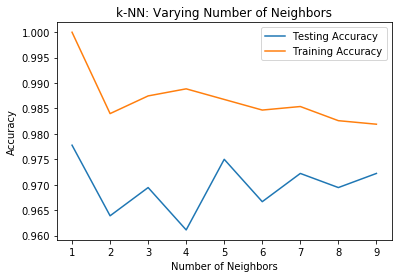

In [49]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()